In [ ]:
#Generate Synthetic Financial Data

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.6639 - loss: 248.2423 - val_accuracy: 0.7350 - val_loss: 177.3720
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7266 - loss: 87.6660 - val_accuracy: 0.7100 - val_loss: 26.6214
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6842 - loss: 41.7449 - val_accuracy: 0.7400 - val_loss: 44.1049
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7025 - loss: 99.8300 - val_accuracy: 0.7350 - val_loss: 300.2615
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7533 - loss: 216.4886 - val_accuracy: 0.7350 - val_loss: 31.6387
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6973 - loss: 59.3549 - val_accuracy: 0.7000 - val_loss: 67.5014
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6733 - loss: 62.4025 - val_accuracy: 0.4600 - val_loss: 24.4068
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6663 - loss: 97.2689 - val_ac

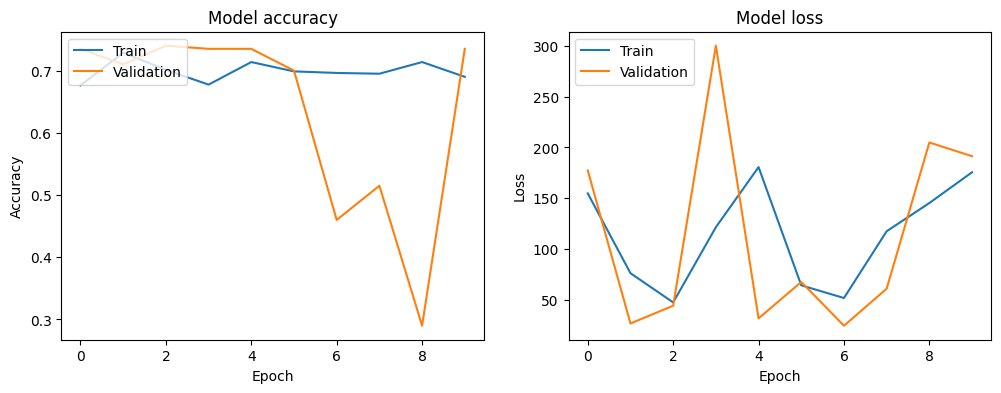

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate synthetic data
data = {
    'income': np.random.randint(30000, 150000, n_samples),
    'loan_amount': np.random.randint(5000, 50000, n_samples),
    'credit_score': np.random.randint(300, 850, n_samples),
    'employment_status': np.random.choice(['employed', 'unemployed'], n_samples),
    'credit_risk': np.random.choice([0, 1], n_samples, p=[0.8, 0.2])  # 0: Low risk, 1: High risk
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert categorical data to numerical
df['employment_status'] = df['employment_status'].map({'employed': 1, 'unemployed': 0})

# Split data into features and target
X = df.drop('credit_risk', axis=1).values
y = df['credit_risk'].values

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Use Input layer as the first layer
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [3]:
data

{'income': array([ 45795,  30860, 133694, 149879, 140268, 106820,  84886,  36265,
        112386,  67194, 117498, 142727,  74131,  90263,  46023,  71090,
         97221,  94820,  30769,  89735,  92955,  94925,  97969,  35311,
        133355, 134724, 113104,  83707, 115305,  58693, 101932, 123016,
        136970,  55658, 114478,  48431,  32747,  89150,  95725, 114654,
         65773, 149346,  97435,  86886,  96803,  61551, 146216,  41394,
         99092,  33890,  71606, 126276, 110038, 117313,  40627,  38792,
        138859, 138557, 103969,  73001, 106552,  53897,  98148,  53483,
         78555,  47159, 140510, 136530, 110077,  65920, 122067,  97121,
         99479, 119475,  49457,  96557, 107189, 139109, 108953,  82995,
         70757,  39692,  75758, 102409, 101211,  95697,  67065, 122093,
        129299,  62606,  41534, 124663,  70397, 121387,  31016, 119789,
         85591, 119812,  53247,  54300, 104065, 112798,  39268, 116807,
         42185,  93704, 116779,  69099,  38571, 135512

In [2]:
df.head()

,income,loan_amount,credit_score,employment_status,credit_risk
0,45795,48125,389,1,0
1,30860,33538,421,1,0
2,133694,37049,442,0,0
3,149879,42131,405,0,0
4,140268,47944,727,1,1


In [4]:
df

,income,loan_amount,credit_score,employment_status,credit_risk
0,45795,48125,389,1,0
1,30860,33538,421,1,0
2,133694,37049,442,0,0
3,149879,42131,405,0,0
4,140268,47944,727,1,1
...,...,...,...,...,...
995,66187,32424,723,0,0
996,142734,23333,631,0,0
997,37239,28116,737,0,0
998,44489,48201,473,1,1


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Create a simple model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Use Input layer as the first layer
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
